In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
# Load the data
data = pd.read_csv("heart.csv")

In [3]:
# Display the first few rows of the dataset
print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [4]:
# Data Exploration
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


In [5]:
print(data.describe())

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

In [6]:
# Check for missing values
print(data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [7]:
len(data)

1025

In [8]:
len(data[data.target==1])

526

In [9]:
len(data[data.target==0])

499

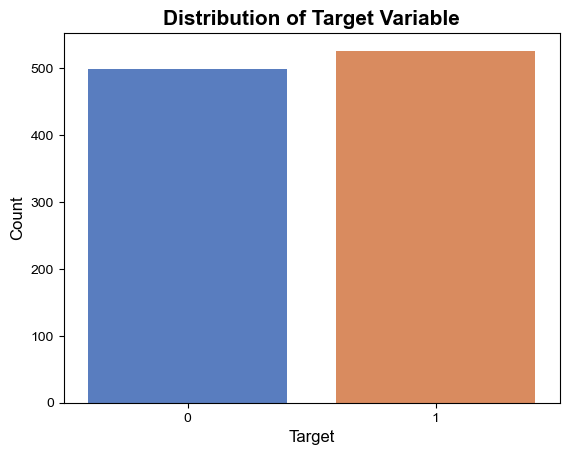

In [10]:
# Setting a specific color palette
palette = sns.color_palette("muted")

# Creating the count plot
sns.countplot(x="target", data=data, palette=palette)

# Adding titles and labels
plt.title("Distribution of Target Variable", fontsize=15, fontweight="bold")
plt.xlabel("Target", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Enhancing the presentation with grid and style
sns.set(style="whitegrid")

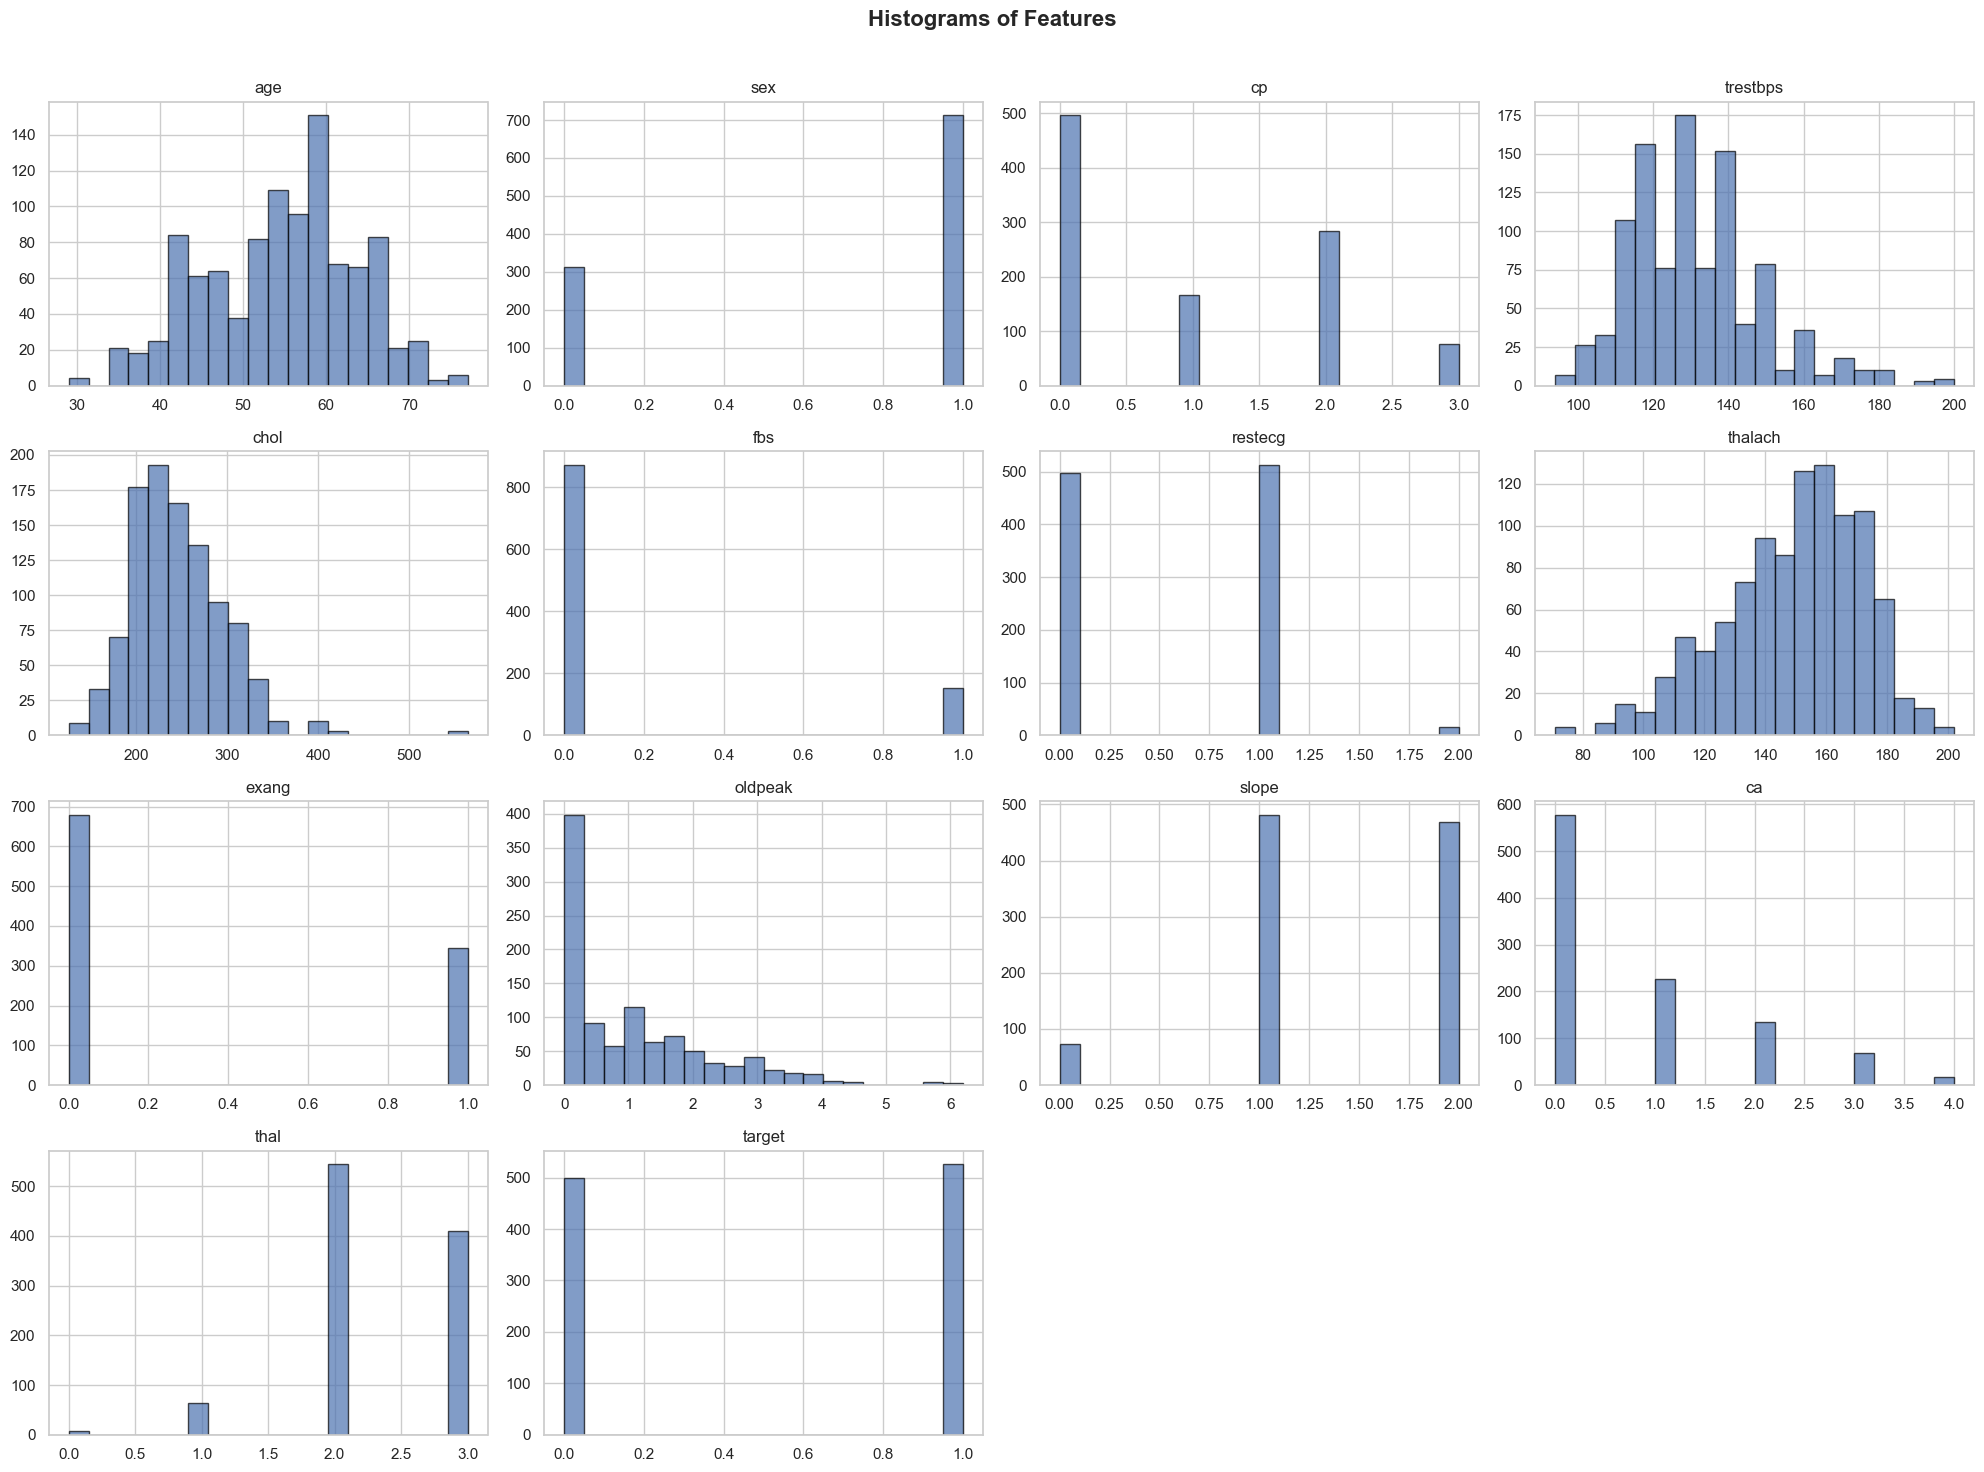

In [11]:
# Set the figure size
fig, axes = plt.subplots(
    nrows=len(data.columns) // 4 + 1, ncols=4, figsize=(20, 15)
)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each feature
for i, col in enumerate(data.columns):
    data[col].hist(bins=20, ax=axes[i], alpha=0.7, edgecolor="black")
    axes[i].set_title(col, fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add a super title
plt.suptitle("Histograms of Features", fontsize=16, fontweight="bold")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Display the plot
plt.show()

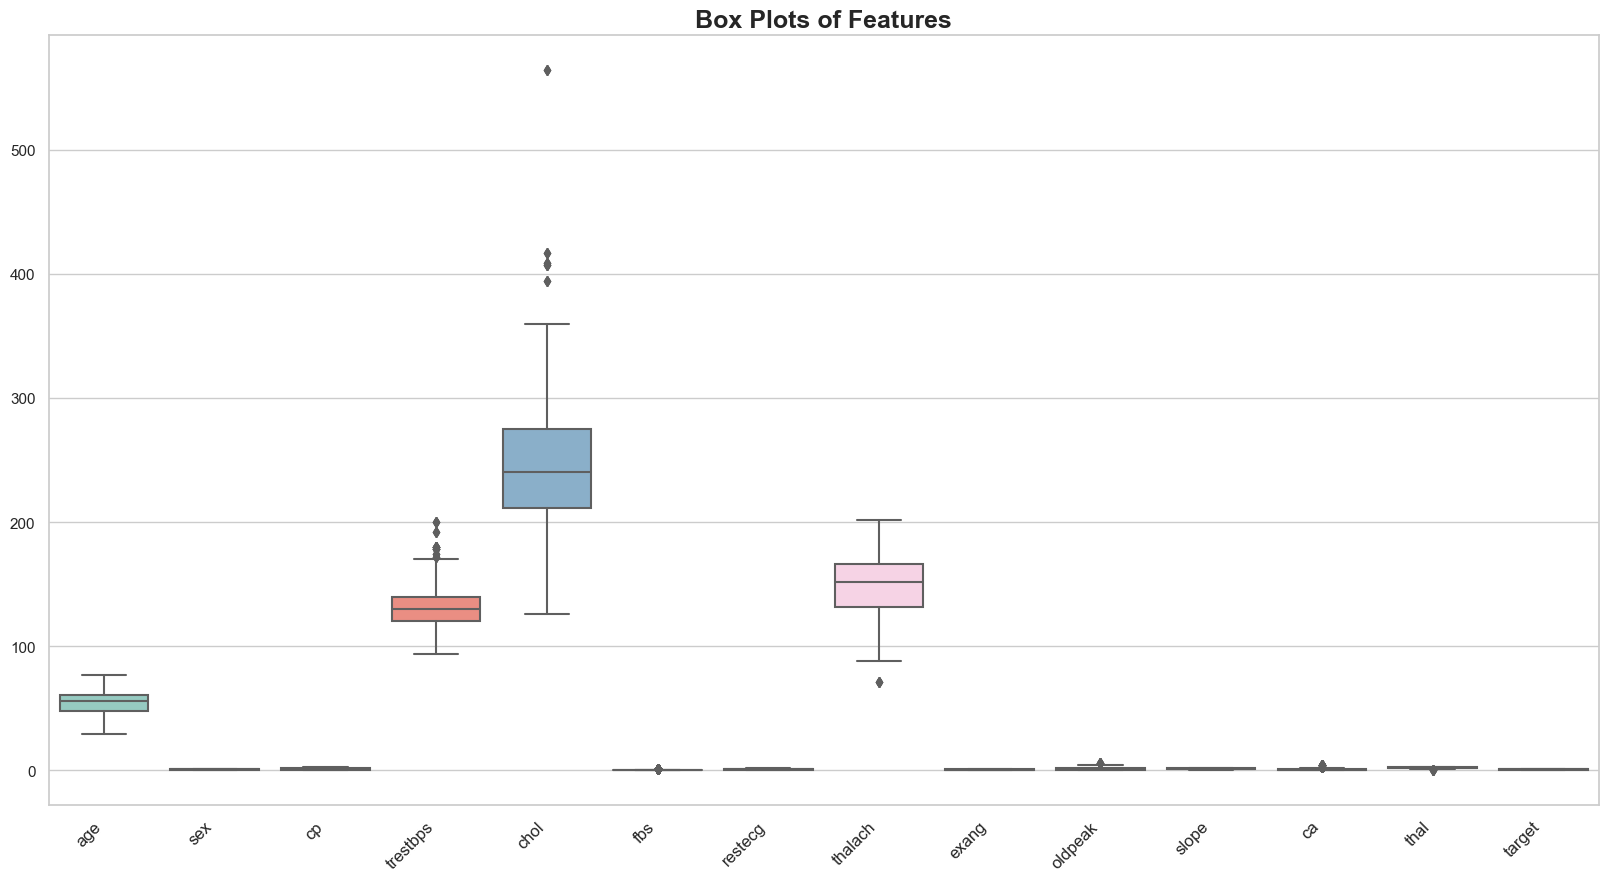

In [12]:
# Set the figure size
plt.figure(figsize=(20, 10))

# Create the box plot
sns.boxplot(data=data, palette="Set3")

# Add title with customized font size and weight
plt.title("Box Plots of Features", fontsize=18, fontweight="bold")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha="right", fontsize=12)

# Display the plot
plt.show()

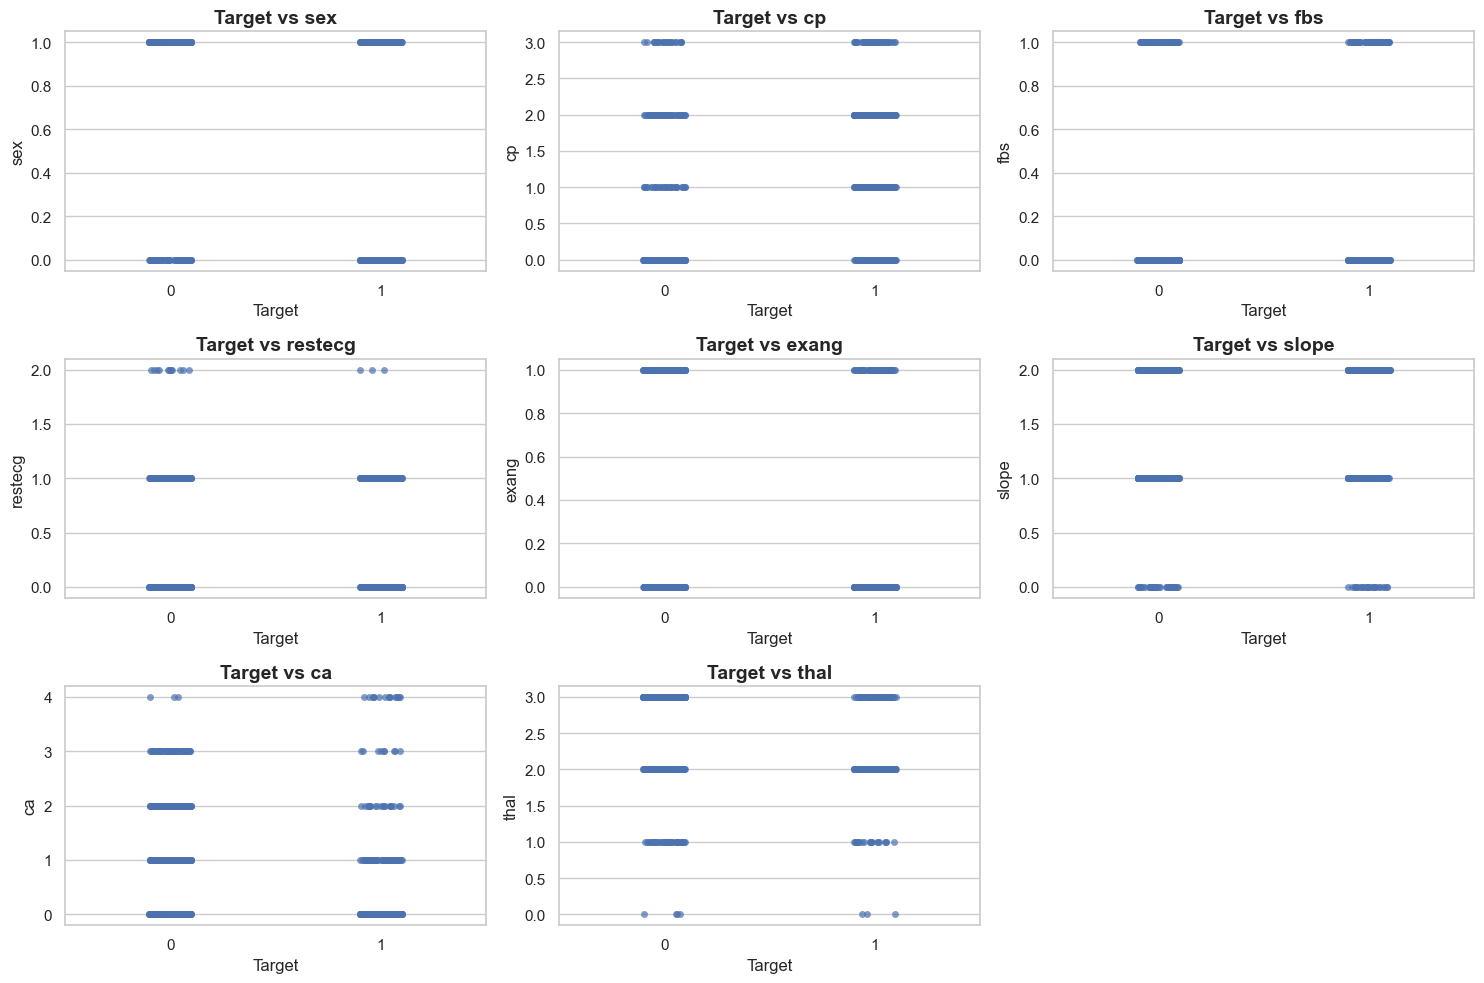

In [13]:
# List of categorical features
categorical_features = [
    "sex",
    "cp",
    "fbs",
    "restecg",
    "exang",
    "slope",
    "ca",
    "thal",
]

# Set the figure size
plt.figure(figsize=(15, 10))

# Create strip plots for each categorical feature
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)  # Create subplots in a 3x3 grid
    sns.stripplot(
        x="target",
        y=feature,
        data=data,
        jitter=True,
        dodge=True,
        marker="o",
        alpha=0.7,
    )
    plt.title(f"Target vs {feature}", fontsize=14, fontweight="bold")
    plt.xlabel("Target", fontsize=12)
    plt.ylabel(feature, fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

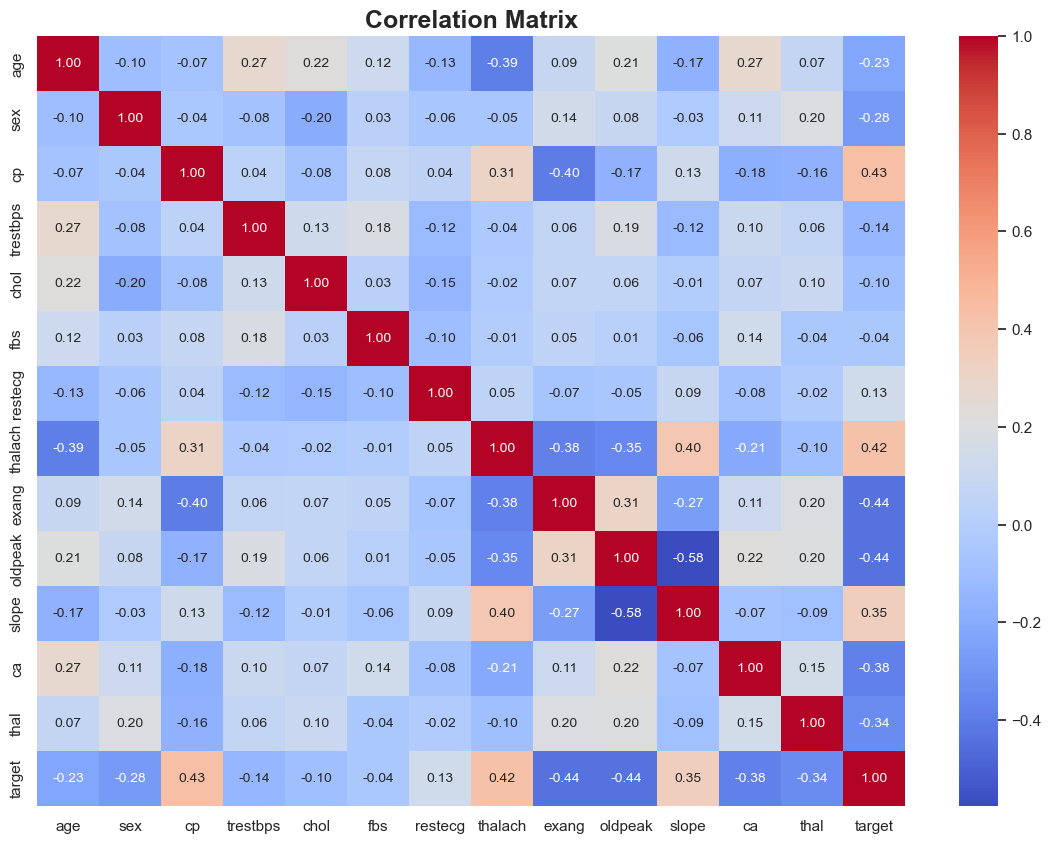

In [14]:
# Set the figure size
plt.figure(figsize=(14, 10))

# Create the heatmap
sns.heatmap(
    data.corr(), annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 10}
)

# Add title with customized font size and weight
plt.title("Correlation Matrix", fontsize=18, fontweight="bold")

# Display the plot
plt.show()

In [15]:
X = data.drop("target", axis=1)
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled


array([[-0.26843658,  0.66150409, -0.91575542, ...,  0.99543334,
         1.20922066,  1.08985168],
       [-0.15815703,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       [ 1.71659547,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       ...,
       [-0.81983438,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459, -0.52212231],
       [-0.4889957 , -1.51170646, -0.91575542, ...,  0.99543334,
        -0.73197147, -0.52212231],
       [-0.04787747,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459,  1.08985168]])

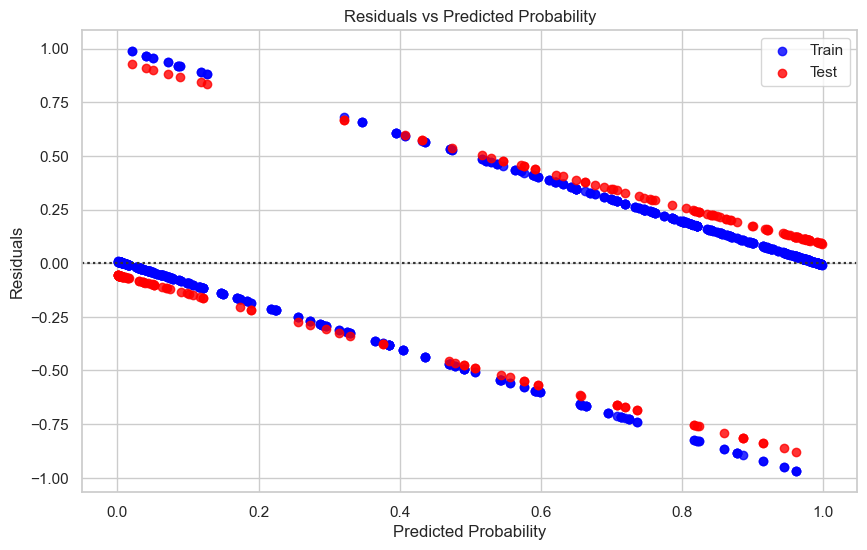

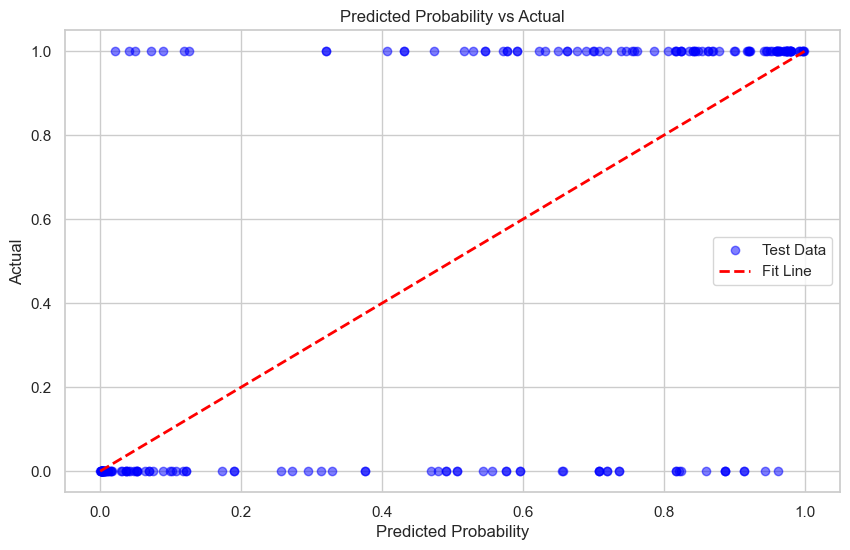

In [16]:
# Split the data into features and target
X = data.drop("target", axis=1)
y = data["target"]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Logistic Regression Model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predictions
y_train_pred_prob = log_model.predict_proba(X_train)[:, 1]
y_test_pred_prob = log_model.predict_proba(X_test)[:, 1]
y_train_pred = log_model.predict(X_train)
y_test_pred = log_model.predict(X_test)

# Residual Plot
plt.figure(figsize=(10, 6))
sns.residplot(
    x=y_train_pred_prob,
    y=y_train - y_train_pred_prob,
    color="blue",
    label="Train",
)
sns.residplot(
    x=y_test_pred_prob, y=y_test - y_test_pred_prob, color="red", label="Test"
)
plt.xlabel("Predicted Probability")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Probability")
plt.legend()
plt.show()

# Predicted vs Actual Scatter Plot with Regression Line
plt.figure(figsize=(10, 6))
plt.scatter(
    y_test_pred_prob, y_test, color="blue", alpha=0.5, label="Test Data"
)
plt.plot(
    [0, 1], [0, 1], color="red", linewidth=2, linestyle="--", label="Fit Line"
)
plt.xlabel("Predicted Probability")
plt.ylabel("Actual")
plt.title("Predicted Probability vs Actual")
plt.legend()
plt.show()

In [17]:
# Split the data into features and target
X = data.drop("target", axis=1)
y = data["target"]

In [18]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [20]:
# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [21]:
# Predictions
y_pred = model.predict(X_test)

In [22]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [23]:
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.80
Confusion Matrix:
[[73 29]
 [13 90]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



In [24]:
# Coefficients
coefficients = pd.DataFrame(
    model.coef_.T, index=X.columns, columns=["Coefficient"]
)
print(coefficients)

          Coefficient
age         -0.006088
sex         -0.838913
cp           0.877432
trestbps    -0.318253
chol        -0.464378
fbs         -0.063000
restecg      0.140452
thalach      0.655543
exang       -0.417631
oldpeak     -0.786980
slope        0.349232
ca          -0.843356
thal        -0.674341


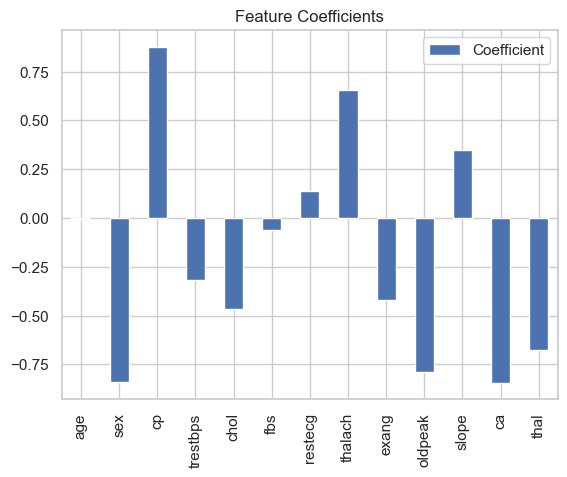

In [25]:
# Visualize coefficients
coefficients.plot(kind="bar")
plt.title("Feature Coefficients")
plt.show()

In [26]:
X = data.drop("target", axis=1)
y = data["target"]

# Add a constant to the independent variables matrix (for the intercept)
X = sm.add_constant(X)

# Fit the logistic regression model
logit_model = sm.Logit(y, X).fit()

# Print the summary
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.350681
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                 1025
Model:                          Logit   Df Residuals:                     1011
Method:                           MLE   Df Model:                           13
Date:                Tue, 08 Jul 2025   Pseudo R-squ.:                  0.4938
Time:                        20:06:07   Log-Likelihood:                -359.45
converged:                       True   LL-Null:                       -710.12
Covariance Type:            nonrobust   LLR p-value:                1.777e-141
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6902      1.401      2.633      0.008       0.944       6.437
age           -0.0082      0.

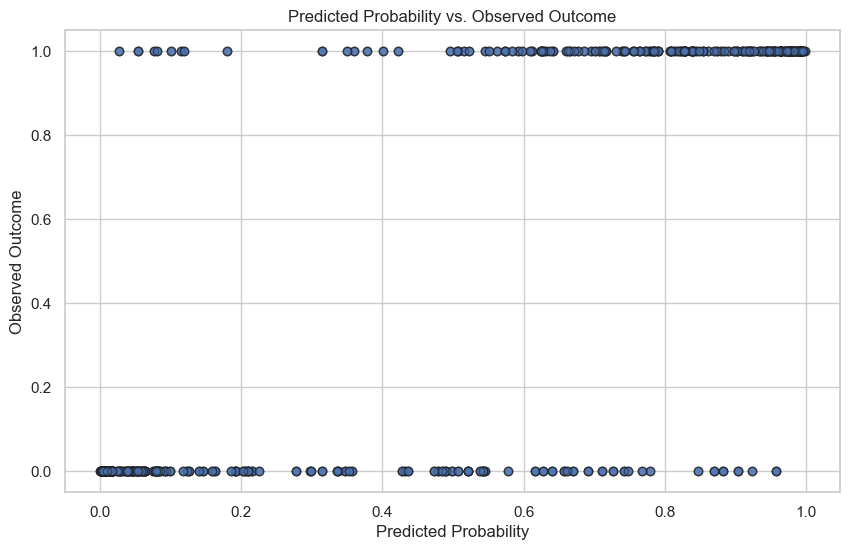

In [27]:
# Get predicted probabilities
predicted_prob = logit_model.predict(X)

# Scatter plot of predicted probabilities vs. actual outcomes
plt.figure(figsize=(10, 6))
plt.scatter(predicted_prob, y, edgecolor="k", alpha=0.5)
plt.xlabel("Predicted Probability")
plt.ylabel("Observed Outcome")
plt.title("Predicted Probability vs. Observed Outcome")
plt.show()